In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import rescomp

import matplotlib.pyplot as plt
import os

# new imports:
from rescomp.alternative_tests import simulation_tests as simt

# Conduct experiment:

In [42]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    sim = parameters["sim"]
    if sim == "modlorenz":
        sys_flag = "mod_lorenz"
    elif sim == "lorenz":
        sys_flag = "lorenz"
    def data_creation_function(time_steps, dt, starting_point):
        return rescomp.simulations.simulate_trajectory(sys_flag, dt, time_steps, starting_point)
    
    return data_creation_function
    
# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    seed = parameters["seed"]
    scale = parameters["scale"]
    randmode = parameters["randmode"]
    np.random.seed(seed)
    if randmode == "normal":
        starting_points = np.random.randn(Nens, 3)
    elif randmode == "uniform":
        starting_points = np.random.uniform(size=(Nens, 3)) - 0.5
    return starting_points*scale

create_sim_func_keys = ["sim"]
create_sp_func_keys = ["seed", "scale", "randmode"]

# create the parameter dict to define the experiment:
parameter_dict = {
    "sim": ["lorenz"],
    "seed": 100,
    "scale": [1, 2],
    "randmode": ["normal", "uniform"],
    
    "dt": [0.01],
    "tau": 10,
    "T": 100, 
    
    "eps": [1e-10]
}

# define Ndims and Nens
Ndims = 3
Nens = 200

# define saving:
save = True
prepath = "simulation_results/17_01_new_testing_algo"
exp_name = "t_21_01_2022_lorenz5"

# other parameters:
get_info = True

out = simt.compare_simulations(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name, Nens=Nens, Ndims=Ndims
                         , get_info=get_info)

--------------------
create_sim_func_keys ['sim']
create_sp_func_keys ['seed', 'scale', 'randmode']
--------------------
--------------------
PARAMETERS: 
sim lorenz
seed 100
scale [1, 2]
randmode ['normal', 'uniform']
dt 0.01
tau 10
T 100
eps 1e-10
--------------------
STARTING CALCULATIONS (4): 
....
CALC: 1/4
{'sim': 'lorenz', 'seed': 100, 'scale': 1, 'randmode': 'normal'}, dt: 0.01, tau: 10, T: 100, eps: 1e-10
N_ens: 1/200
..calculating transient..
timestep 10000/10000
N_ens: 2/200
..calculating transient..
timestep 10000/10000
N_ens: 3/200
..calculating transient..
timestep 10000/10000
N_ens: 4/200
..calculating transient..
timestep 10000/10000
N_ens: 5/200
..calculating transient..
timestep 10000/10000
N_ens: 6/200
..calculating transient..
timestep 10000/10000
N_ens: 7/200
..calculating transient..
timestep 10000/10000
N_ens: 8/200
..calculating transient..
timestep 10000/10000
N_ens: 9/200
..calculating transient..
timestep 10000/10000
N_ens: 10/200
..calculating transient..
ti

timestep 10000/10000
N_ens: 86/200
..calculating transient..
timestep 10000/10000
N_ens: 87/200
..calculating transient..
timestep 10000/10000
N_ens: 88/200
..calculating transient..
timestep 10000/10000
N_ens: 89/200
..calculating transient..
timestep 10000/10000
N_ens: 90/200
..calculating transient..
timestep 10000/10000
N_ens: 91/200
..calculating transient..
timestep 10000/10000
N_ens: 92/200
..calculating transient..
timestep 10000/10000
N_ens: 93/200
..calculating transient..
timestep 10000/10000
N_ens: 94/200
..calculating transient..
timestep 10000/10000
N_ens: 95/200
..calculating transient..
timestep 10000/10000
N_ens: 96/200
..calculating transient..
timestep 10000/10000
N_ens: 97/200
..calculating transient..
timestep 10000/10000
N_ens: 98/200
..calculating transient..
timestep 10000/10000
N_ens: 99/200
..calculating transient..
timestep 10000/10000
N_ens: 100/200
..calculating transient..
timestep 10000/10000
N_ens: 101/200
..calculating transient..
timestep 10000/10000
N

timestep 10000/10000
N_ens: 45/200
..calculating transient..
timestep 10000/10000
N_ens: 46/200
..calculating transient..
timestep 10000/10000
N_ens: 47/200
..calculating transient..
timestep 10000/10000
N_ens: 48/200
..calculating transient..
timestep 10000/10000
N_ens: 49/200
..calculating transient..
timestep 10000/10000
N_ens: 50/200
..calculating transient..
timestep 10000/10000
N_ens: 51/200
..calculating transient..
timestep 10000/10000
N_ens: 52/200
..calculating transient..
timestep 10000/10000
N_ens: 53/200
..calculating transient..
timestep 10000/10000
N_ens: 54/200
..calculating transient..
timestep 10000/10000
N_ens: 55/200
..calculating transient..
timestep 10000/10000
N_ens: 56/200
..calculating transient..
timestep 10000/10000
N_ens: 57/200
..calculating transient..
timestep 10000/10000
N_ens: 58/200
..calculating transient..
timestep 10000/10000
N_ens: 59/200
..calculating transient..
timestep 10000/10000
N_ens: 60/200
..calculating transient..
timestep 10000/10000
N_e

timestep 10000/10000
N_ens: 187/200
..calculating transient..
timestep 10000/10000
N_ens: 188/200
..calculating transient..
timestep 10000/10000
N_ens: 189/200
..calculating transient..
timestep 10000/10000
N_ens: 190/200
..calculating transient..
timestep 10000/10000
N_ens: 191/200
..calculating transient..
timestep 10000/10000
N_ens: 192/200
..calculating transient..
timestep 10000/10000
N_ens: 193/200
..calculating transient..
timestep 10000/10000
N_ens: 194/200
..calculating transient..
timestep 10000/10000
N_ens: 195/200
..calculating transient..
timestep 10000/10000
N_ens: 196/200
..calculating transient..
timestep 10000/10000
N_ens: 197/200
..calculating transient..
timestep 10000/10000
N_ens: 198/200
..calculating transient..
timestep 10000/10000
N_ens: 199/200
..calculating transient..
timestep 10000/10000
N_ens: 200/200
..calculating transient..
timestep 10000/10000


# View results:

In [29]:
prepath = "simulation_results/17_01_new_testing_algo"
exp_name = "t_21_01_2022_lorenz4"

### View info file:

In [30]:
info_dict = simt.load_info_file(prepath, exp_name)
info_dict

{'Ndims': 3,
 'Nens': 40,
 'date': '21/01/2022',
 'exp_name': 't_21_01_2022_lorenz4',
 'parameter_dict': {'T': [100],
  'dt': [0.01, 0.05],
  'eps': [0.0001, 1e-06, 1e-10],
  'seed': [100],
  'sim': ['lorenz'],
  'tau': [10]},
 'time[min]': '23.754'}

### View single data file:

sim_lorenz__seed_100__dt_1p00e-01__tau_10__T_100__eps_1p00e-04__Ndims_1__Nens_2
shape of file: (1001, 1, 2)


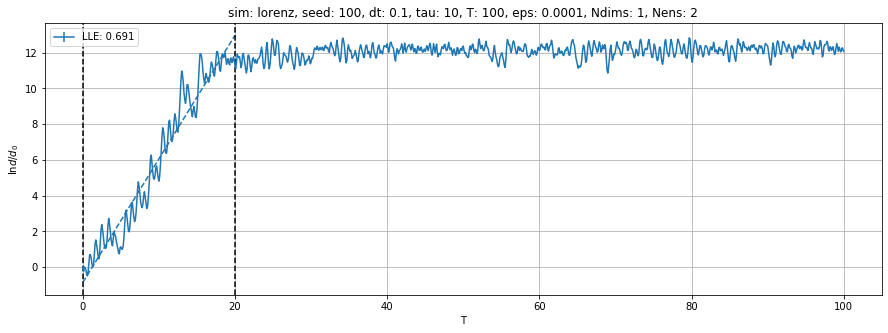

In [14]:
# plot single files: 

file_name = "sim_lorenz__seed_100__dt_1p00e-01__tau_10__T_100__eps_1p00e-04__Ndims_1__Nens_2"

plt.figure(figsize=(15, 5))
ax = plt.gca()

include_fit = 1
mean_axs = "all"
show_error = 0

dim_index = None
ens_index = None

# dim_index = [1, 2, 3, 4, 5, 3]
# ens_index = 0

t_min = 0
t_max = 20

simt.plot_div_file(ax, file_name, prepath=prepath, exp_name=exp_name, mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max)

# plt.xlim(0, 25)
ax.axvline(t_min, c="k", linestyle="--")
ax.axvline(t_max, c="k", linestyle="--")

# plt.ylim(-1, 10)

### View the whole experiment:

lines: 3, cols: 2, rows: 1


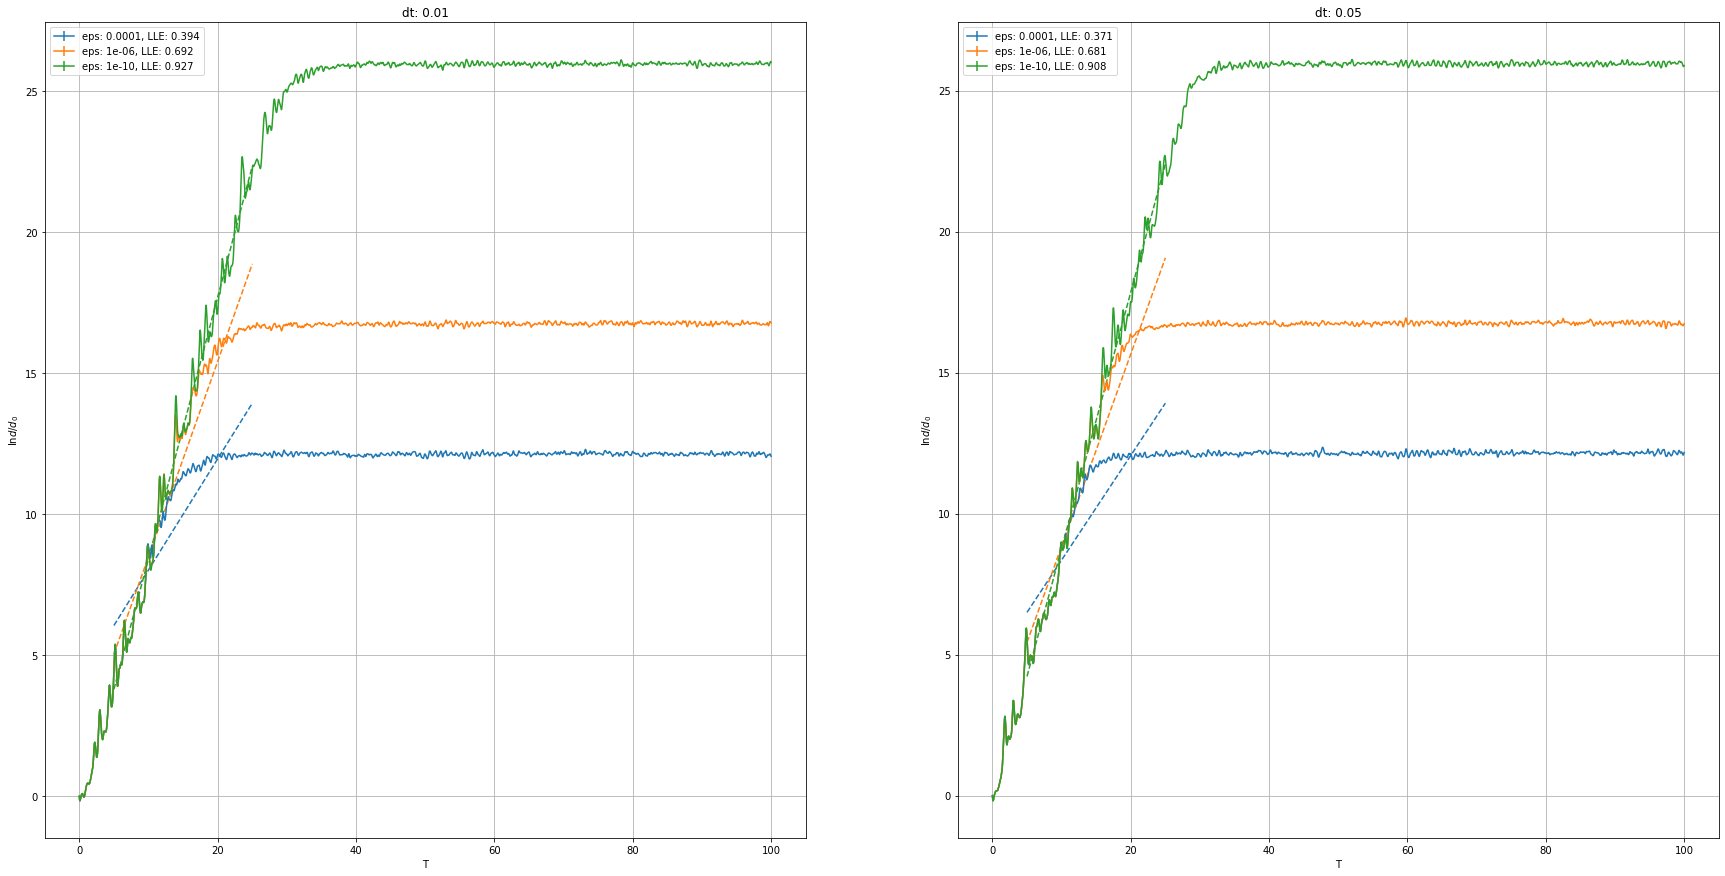

In [40]:
zs = "eps"
xs = "dt"
ys = []

# simt.plot_div_file kwargs
include_fit = 1
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None
t_min = 5
t_max = 25

subfigsize = (15, 15)
simt.plot_div_experiment(prepath, exp_name, zs, xs, ys, subfigsize=(15, 15), mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max)